# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Rahmat Ramadhan
- Email: rahmatrmdn15@gmail.com
- Id Dicoding: ramadhan15

## Persiapan

### Menyiapkan library yang dibutuhkan

In [3]:
# Mengimpor pustaka yang diperlukan untuk analisis data dan visualisasi
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib


# Mengimpor modul dari scikit-learn untuk pemrosesan data dan model machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Mengimpor pustaka untuk koneksi database dan penyimpanan model
from sqlalchemy import create_engine
import pickle

### Menyiapkan data yang akan diguankan

In [4]:
# Load Dataset
df = pd.read_csv('data.csv',delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [5]:
# Mengecek missing value
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [6]:
# Mengecek data duplikat
df.info()
print("Jumlah duplikat : ", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [7]:
# Menampilkan deskripsi data frame
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [8]:
# Mengecek nilaik unik tiap kolom
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"Kolom '{col}' memiliki {unique_count} nilai unik.")

Kolom 'Marital_status' memiliki 6 nilai unik.
Kolom 'Application_mode' memiliki 18 nilai unik.
Kolom 'Application_order' memiliki 8 nilai unik.
Kolom 'Course' memiliki 17 nilai unik.
Kolom 'Daytime_evening_attendance' memiliki 2 nilai unik.
Kolom 'Previous_qualification' memiliki 17 nilai unik.
Kolom 'Previous_qualification_grade' memiliki 101 nilai unik.
Kolom 'Nacionality' memiliki 21 nilai unik.
Kolom 'Mothers_qualification' memiliki 29 nilai unik.
Kolom 'Fathers_qualification' memiliki 34 nilai unik.
Kolom 'Mothers_occupation' memiliki 32 nilai unik.
Kolom 'Fathers_occupation' memiliki 46 nilai unik.
Kolom 'Admission_grade' memiliki 620 nilai unik.
Kolom 'Displaced' memiliki 2 nilai unik.
Kolom 'Educational_special_needs' memiliki 2 nilai unik.
Kolom 'Debtor' memiliki 2 nilai unik.
Kolom 'Tuition_fees_up_to_date' memiliki 2 nilai unik.
Kolom 'Gender' memiliki 2 nilai unik.
Kolom 'Scholarship_holder' memiliki 2 nilai unik.
Kolom 'Age_at_enrollment' memiliki 46 nilai unik.
Kolom 'Int

In [9]:
# Mengubah tipe data ke kategori
categorical_cols = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs',
    'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4424 n

In [11]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


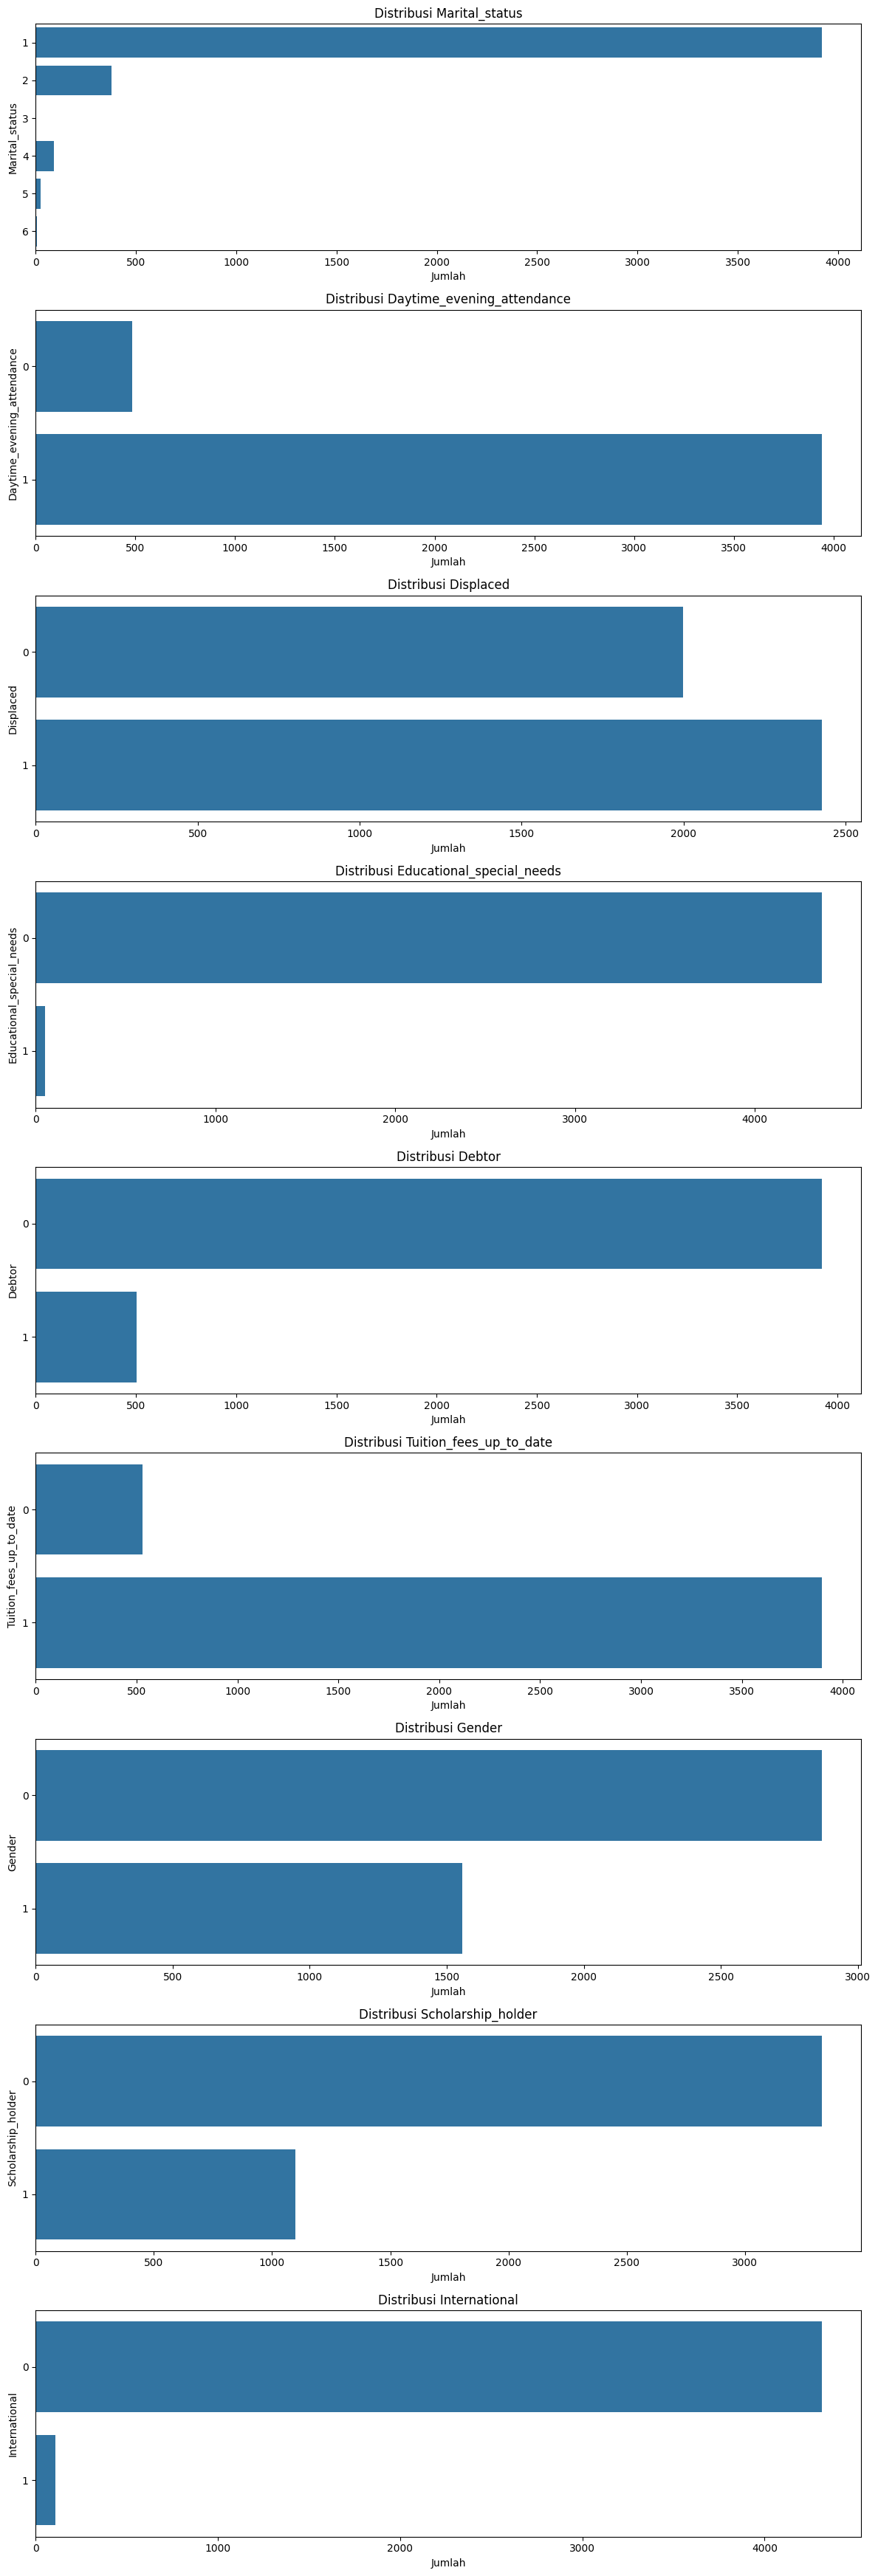

In [12]:
# Visualisasi distribusi data kategorikal yang memiliki sedikit kategori
categorical_columns = [
    'Marital_status', 'Daytime_evening_attendance',
    'Displaced', 'Educational_special_needs',
    'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]

fig, ax = plt.subplots(len(categorical_columns), 1, figsize=(12, 35))

for i, feature in enumerate(categorical_columns):
    sns.countplot(data=df, y=feature, ax=ax[i])
    ax[i].set_title(f'Distribusi {feature}')
    ax[i].set_xlabel('Jumlah')
    ax[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

### Penjelasan Visualisasi
1. Marital_status
- Label: 1 = Single, 2 = Married, 3 = Widower, 4 = Divorced, 5 = Facto Union, 6 = Legally Separated
- Insight: Mahasiswa yang single (1) sangat dominan. Artinya, mayoritas mahasiswa dalam dataset ini belum menikah. Kategori lain jumlahnya jauh lebih sedikit.
2. Daytime_evening_attendance
- Label: 1 = Daytime, 0 = Evening
- Insight: Mahasiswa yang hadir pada malam hari (0) lebih banyak dibanding yang hadir siang hari. Hal ini mungkin berkaitan dengan program kerja atau jalur khusus (misalnya kelas karyawan).
3. Displaced
- Label: 1 = Ya (Displaced), 0 = Tidak
- Insight: Distribusi terlihat cukup seimbang, artinya cukup banyak mahasiswa yang berasal dari luar wilayah kampus (mungkin daerah terpencil atau terdampak situasi tertentu).
4. Educational_special_needs
- Label: 1 = Ya, 0 = Tidak
- Insight: Hampir semua mahasiswa tidak memiliki kebutuhan khusus, fitur ini sangat imbalanced.
5. Debtor
- Label: 1 = Ya (memiliki utang), 0 = Tidak
- Insight: Mayoritas mahasiswa tidak berstatus debitur, tetapi tetap ada sekelompok yang berutang, bisa menjadi indikator risiko dropout.
6. Tuition_fees_up_to_date
- Label: 1 = Ya, 0 = Tidak
- Insight: Sebagian besar mahasiswa memiliki pembayaran SPP yang lancar, namun mahasiswa yang belum melunasi bisa menjadi perhatian khusus.
7. Gender
- Label: 1 = Male, 0 = Female
- Insight: Jumlah laki-laki lebih tinggi dibanding perempuan, meskipun tidak terlalu jauh. Ini penting untuk melihat apakah gender punya pengaruh terhadap dropout atau tidak.
8. Scholarship_holder
- Label: 1 = Ya (menerima beasiswa), 0 = Tidak
- Insight: Lebih banyak mahasiswa yang tidak menerima beasiswa, namun penerima beasiswa juga cukup signifikan dan bisa berpengaruh pada performa akademik.
9. International
- Label: 1 = Ya (mahasiswa internasional), 0 = Tidak
- Insight: Hampir semua mahasiswa bukan mahasiswa internasional, fitur ini sangat imbalanced dan mungkin tidak terlalu berpengaruh pada model jika tidak ada korelasi kuat.

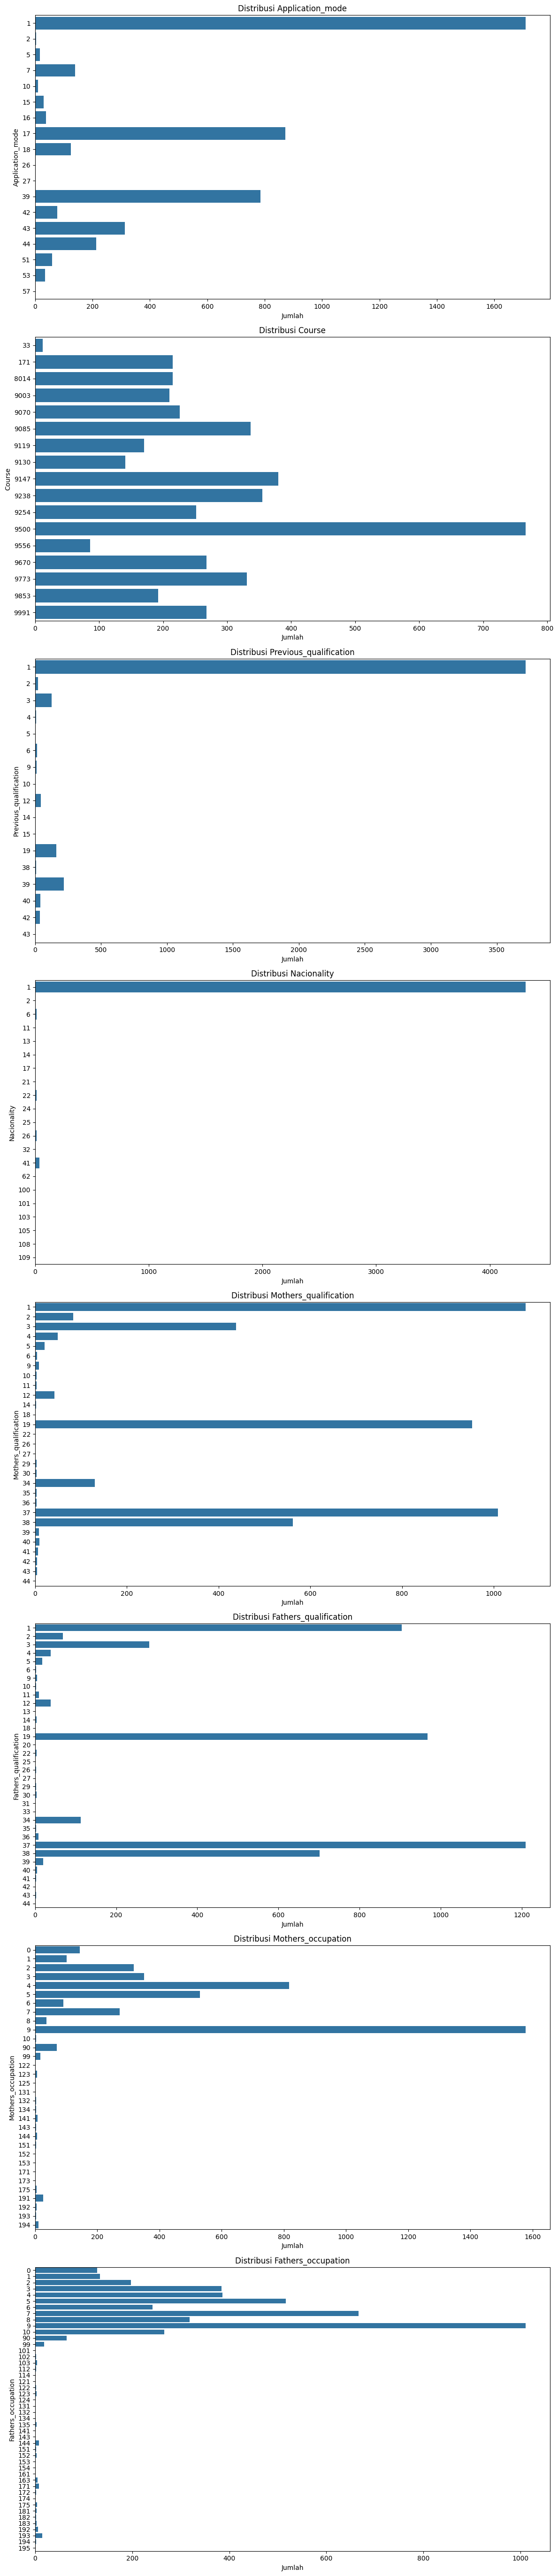

In [13]:
# Visualisasi distribusi data kategorikal yang memiliki banyak kategori
categorical_columns1 = [
    'Application_mode', 'Course', 'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation'
]

fig, ax = plt.subplots(len(categorical_columns1), 1, figsize=(12, 55))

for i, feature in enumerate(categorical_columns1):
    sns.countplot(data=df, y=feature, ax=ax[i])
    ax[i].set_title(f'Distribusi {feature}')
    ax[i].set_xlabel('Jumlah')
    ax[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

### Penjelasan Visualisasi
1. Distribusi Application_mode
- Mayoritas mahasiswa mendaftar melalui mode 1 (1st phase - general contingent).

- Terdapat juga jumlah signifikan pada mode 17 (2nd phase) dan 39 (Over 23 years old).

- Mode pendaftaran lainnya jauh lebih sedikit, menunjukkan bahwa sebagian besar mahasiswa menggunakan jalur umum dan reguler.

2. Distribusi Course
- Beberapa jurusan seperti Nursing (9500) dan Management (9147) memiliki jumlah mahasiswa paling banyak.

- Jurusan lain seperti Biofuel Production Technologies (33) memiliki mahasiswa sangat sedikit.

- Hal ini penting untuk melihat program mana yang memiliki daya tarik tinggi atau potensi dropout tinggi.

3. Distribusi Previous_qualification
- Sebagian besar mahasiswa berasal dari kualifikasi 1 (Secondary Education).

- Ini sesuai dengan harapan bahwa mahasiswa masuk dari pendidikan menengah ke pendidikan tinggi.

- Jumlah dengan kualifikasi lainnya seperti 2–10 sangat kecil.

4. Distribusi Nacionality
- Dominasi besar oleh mahasiswa nasionalitas 1 (Portugal).

- Mahasiswa dari negara lain sangat sedikit (contoh: Brasil, Mozambik, Rumania, dll), menunjukkan bahwa ini adalah institusi lokal dengan sebagian kecil pelajar internasional.

5. Distribusi Mothers_qualification
- Tertinggi pada label 34 (Unknown) dan 37 (Basic Education 1st cycle), menunjukkan bahwa banyak ibu mahasiswa memiliki tingkat pendidikan dasar atau tidak diketahui.

- Tingkat pendidikan tinggi (Master, Doctorate) sangat sedikit.

6. Distribusi Fathers_qualification
- Pola mirip dengan ibu: pendidikan dasar dan tidak diketahui mendominasi.

- Hal ini bisa menjadi faktor sosio-ekonomi yang memengaruhi performa akademik anak.

7. Distribusi Mothers_occupation
-  Banyak ibu tercatat sebagai 9 (Unskilled Workers) atau pekerjaan rumah tangga lainnya.

- Beberapa bekerja sebagai pekerja layanan pribadi, staf administrasi, atau profesi pendidikan.

8. Distribusi Fathers_occupation
- Lebih bervariasi dibanding ibu.

-  Banyak ayah bekerja di sektor seperti unskilled workers, technicians, atau security and services.

- Ini menunjukkan latar belakang ekonomi mahasiswa sebagian besar dari kelas menengah ke bawah.

In [14]:
# Daftar kolom numerik
numerical_columns = [
    'Application_order', 'Previous_qualification_grade', 'Admission_grade',
    'Age_at_enrollment', 'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
    'Inflation_rate', 'GDP'
]

# Menampilkan jumlah kemunculan tiap nilai unik di setiap kolom numerik
for col in numerical_columns:
    print(f"\nValue counts untuk kolom: {col}")
    print(df[col].value_counts())



Value counts untuk kolom: Application_order
Application_order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64

Value counts untuk kolom: Previous_qualification_grade
Previous_qualification_grade
133.1    491
130.0    375
140.0    336
120.0    278
150.0    162
        ... 
169.0      1
138.7      1
119.1      1
118.9      1
126.6      1
Name: count, Length: 101, dtype: int64

Value counts untuk kolom: Admission_grade
Admission_grade
130.0    162
140.0    153
120.0    145
100.0    116
150.0     81
        ... 
162.1      1
103.8      1
156.2      1
165.2      1
103.6      1
Name: count, Length: 620, dtype: int64

Value counts untuk kolom: Age_at_enrollment
Age_at_enrollment
18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
35      49
30      49
33      45
37      42
39      38
36      35
41      31
38      29
43     

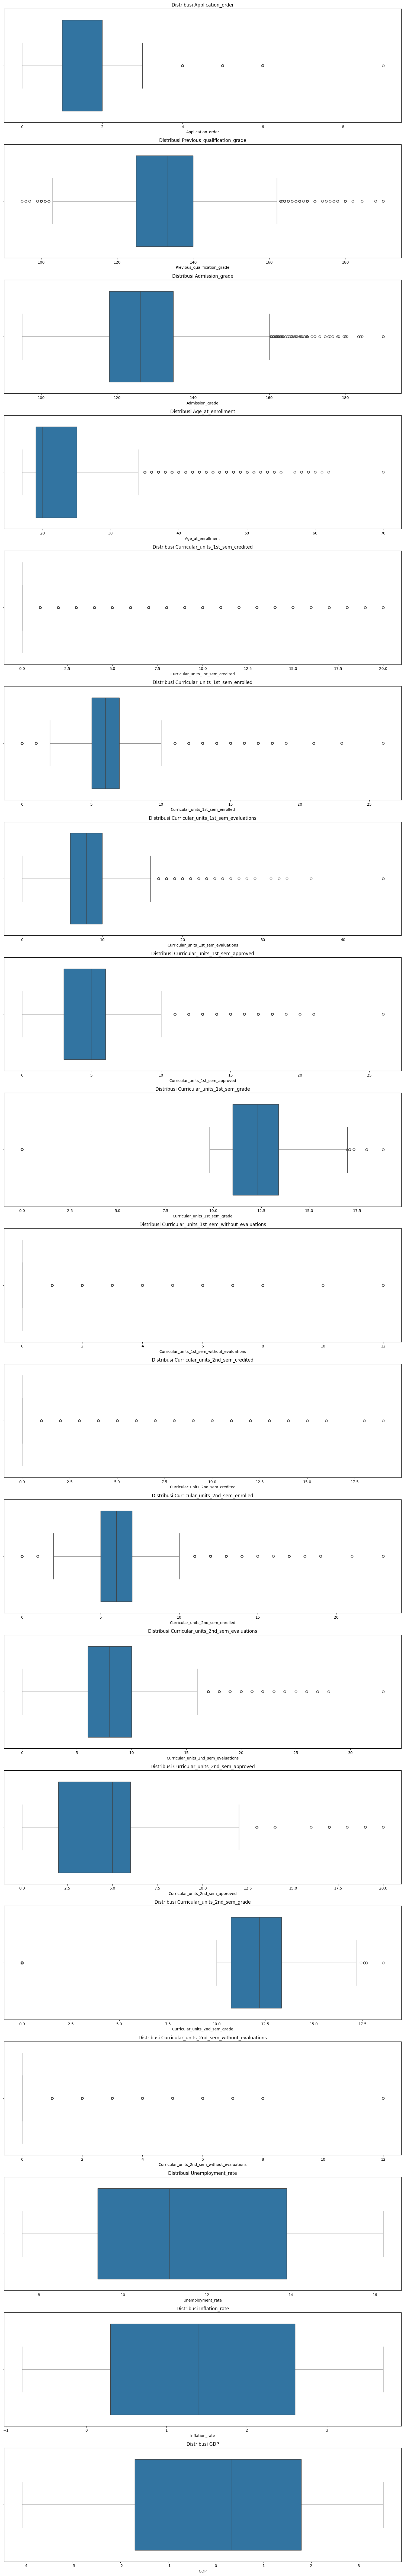

In [15]:
# Memvisualisasikan distribusi fitur numerik
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1, figsize=(15, max(5 * len(features), 10)))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
        ax[i].set_title(f'Distribusi {feature}')
    plt.tight_layout()
    plt.show()

# Jalankan visualisasi
numerical_dis_plot(
    features=numerical_columns,
    df=df
    )

### Penjelasan Visualisasi
1. Application_order

- Menunjukkan urutan pilihan saat mendaftar kuliah.

- Median sekitar urutan 1–2, menunjukkan kebanyakan mahasiswa mendapat pilihan awal mereka.

- Outlier di angka tinggi bisa jadi mahasiswa yang ditempatkan bukan pada jurusan favoritnya.

2. Previous_qualification_(grade)

- Distribusi nilai cukup lebar, rata-rata nilai masuk berada di sekitar 130–150.

- Terlihat banyak outlier, menunjukkan ada sebagian mahasiswa yang masuk dengan nilai sangat rendah atau sangat tinggi.

3. Admission_grade

- Distribusi mirip dengan nilai sebelumnya.

- Median cukup tinggi, menandakan mayoritas memiliki nilai masuk yang baik.

4. Age_at_enrollment

- Mayoritas mahasiswa mendaftar pada usia 17–21 tahun.

- Ada outlier yang sangat tua, bisa jadi mahasiswa non-tradisional atau pekerja yang kembali kuliah.

5. Curricular_units_1st_sem_(credited)

- Mayoritas mahasiswa memiliki nilai 0 (tidak ada kredit yang dibawa dari tempat lain).

- Terdapat beberapa outlier yang memiliki nilai > 0.

6. Curricular_units_1st_sem_(enrolled)

- Mayoritas mahasiswa mengambil 5–8 mata kuliah.

- Beberapa mengambil lebih atau kurang secara signifikan (outlier).

7. Curricular_units_1st_sem_(evaluations)

- Jumlah evaluasi (ujian/tugas) juga bervariasi dengan banyak outlier.

8. Curricular_units_1st_sem_(approved)

- Banyak mahasiswa menyelesaikan 0–5 mata kuliah di semester pertama.

- Terdapat mahasiswa yang menyelesaikan >10 mata kuliah, ini bisa menjadi pertanda siswa unggul atau sistem kurikulum yang fleksibel.

9. Curricular_units_1st_sem_(grade)

- Nilai semester pertama memiliki sebaran yang sangat luas, dari sangat rendah hingga tinggi.

- Banyak outlier dengan nilai ekstrim yang bisa menjadi perhatian untuk dianalisis lebih lanjut.

10. Curricular_units_1st_sem_(without_evaluations)

- Mayoritas mahasiswa memiliki nilai 0, artinya mereka menyelesaikan semua evaluasi mata kuliah semester 1.

- Terdapat outlier signifikan (ada mahasiswa yang tidak mengikuti evaluasi untuk beberapa atau bahkan semua mata kuliah).

11. Curricular_units_2nd_sem_(credited)

- Hampir semua mahasiswa tidak memiliki mata kuliah yang dikreditkan di semester 2.

- Outlier menunjukkan beberapa mahasiswa memiliki kredit transfer.

12. Curricular_units_2nd_sem_(enrolled)

- Rata-rata mahasiswa mengambil 6–8 mata kuliah.

- Terdapat mahasiswa yang hanya mengambil sedikit (1–2) atau sangat banyak (di atas 10), ini bisa menjadi tanda kondisi akademik khusus.

13. Curricular_units_2nd_sem_(evaluations)

- Polanya mirip dengan enrolled.

- Evaluasi yang tinggi bisa mencerminkan program studi yang padat.

14. Curricular_units_2nd_sem_(approved)

- Terdapat mahasiswa yang tidak lulus mata kuliah sama sekali.

- Ini sangat relevan untuk memprediksi dropout — mahasiswa yang tidak lulus bisa menjadi kandidat dropout kuat.

15. Curricular_units_2nd_sem_(grade)

- Distribusi nilai sangat lebar.

- Banyak mahasiswa memiliki nilai rendah, beberapa ekstrem di bawah 5.

16. Curricular_units_2nd_sem_(without_evaluations)

- Menunjukkan berapa mata kuliah yang tidak diikuti evaluasinya oleh mahasiswa.

- Sebagian besar nol, tapi ada outlier yang signifikan (indikasi potensi dropout).

17. Unemployment_rate

- Data rata-rata menunjukkan konsistensi namun dengan outlier—mungkin karena waktu berbeda atau daerah tertentu.

18. Inflation_rate

- Sangat sempit distribusinya, hampir semua berada dalam kisaran nilai yang sama.

- Tidak banyak variasi signifikan.

19. GDP

- GDP juga memiliki sebaran yang relatif kecil, namun masih menunjukkan adanya outlier.




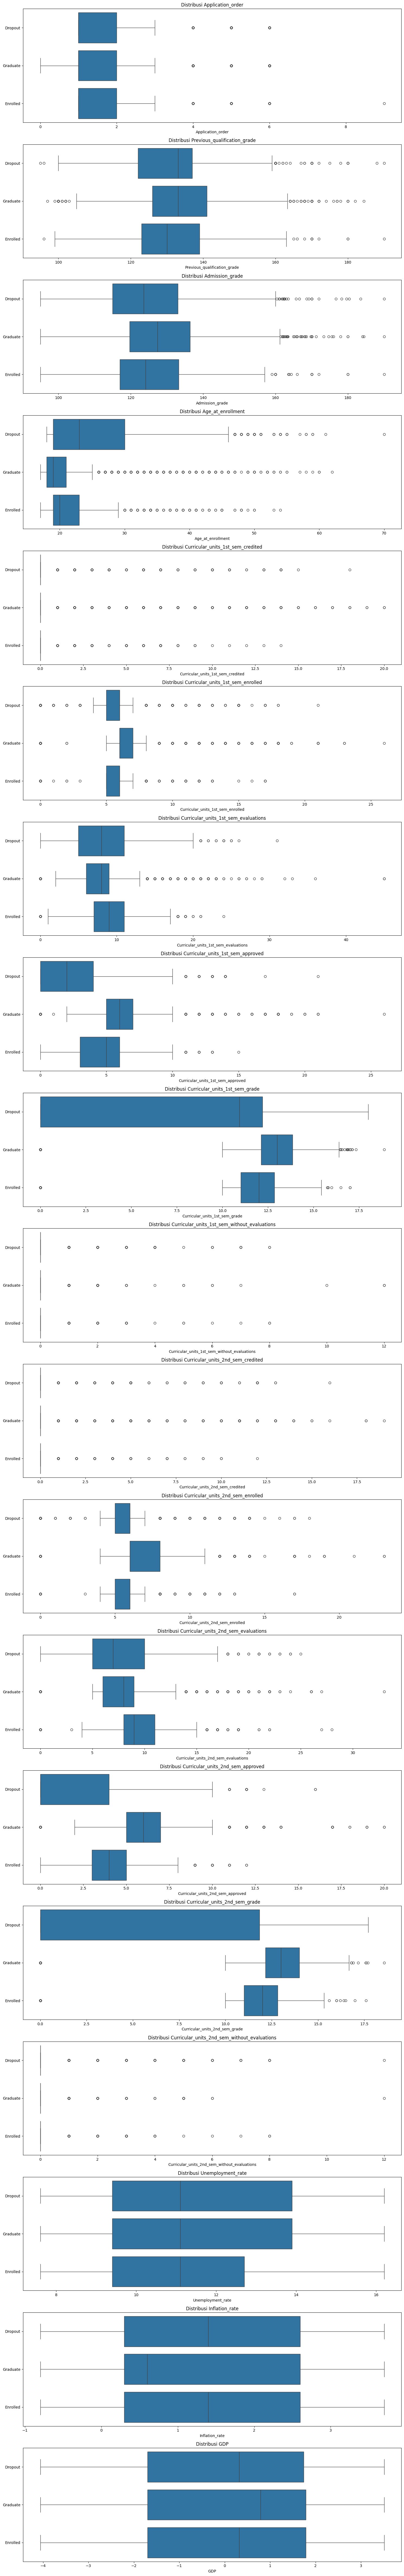

In [16]:
# Memvisualisasikan boxplot fitur-fitur numerik berdasarkan nilai pada kolom Status
numerical_dis_plot(
    features=numerical_columns,
    df=df,
    segment_feature="Status"
)

###Penjelasan Visualisasi
1. Application_order
- Ketiga kelompok status memiliki distribusi mirip, dengan median di urutan 1–2.

- Terdapat outlier hingga urutan ke-7 pada semua kategori, menandakan sebagian mahasiswa ditempatkan di pilihan belakang.

- Mahasiswa Dropout tampak memiliki sebaran nilai yang sedikit lebih lebar, yang mungkin mengindikasikan ketidaksesuaian minat dengan jurusan yang dipilih, berpotensi memicu dropout.

2. Previous qualification grade

- Distribusi graduate dan enrolled lebih tinggi dibanding dropout.

- Dropout cenderung nilai rendah, meskipun ada overlap antar kategori.

3. Admission grade

- Graduate memiliki median nilai lebih tinggi.

- Dropout cenderung nilai lebih rendah dan sebarannya lebih lebar.

4. Age at enrollment

- Mahasiswa dropout dan enrolled umumnya lebih muda.

- Graduate tersebar di usia sedikit lebih tua.

- Ada outlier usia cukup tinggi, terutama pada dropout.

5. Curricular units 1st sem (credited)

- Hampir semua mahasiswa tidak mendapat kredit.

- Namun, graduate sedikit lebih banyak yang memiliki nilai >0.

6. Curricular units 1st sem (enrolled)

- Graduate mengambil lebih banyak unit dibanding dropout dan enrolled.

- Dropout punya jumlah unit paling sedikit.

7. Curricular units 1st sem (evaluations)

- Graduate menjalani lebih banyak evaluasi.

- Dropout sangat sedikit melakukan evaluasi.

8. Curricular units 1st sem (approved)

- Graduate memiliki jumlah unit yang disetujui tertinggi.

- Dropout sangat rendah – menunjukkan performa buruk.

9. Curricular units 1st sem (grade)

- Nilai graduate tertinggi dan konsisten.

- Dropout sangat rendah – distribusi nilai buruk.

10. Curricular units 1st sem (without evaluations)

- Dropout memiliki nilai tinggi – artinya banyak unit tidak pernah dievaluasi.

- Graduate hampir semuanya mendapat evaluasi.

11. Curricular units 2nd sem (credited)

- Pola serupa semester 1: hampir semua 0, graduate sedikit lebih baik.

12. Curricular units 2nd sem (enrolled)

- Graduate mengambil lebih banyak unit semester 2.

- Dropout jumlah unit sedikit.

13. Curricular units 2nd sem (evaluations)

- Graduate dievaluasi lebih banyak.

- Dropout sangat sedikit.

14. Curricular units 2nd sem (approved)

- Graduate punya unit disetujui lebih banyak, dropout rendah.

15. Curricular units 2nd sem (grade)

- Graduate mendapat nilai tinggi dan konsisten.

- Dropout: nilai rendah dan menyebar.

16. Curricular units 2nd sem (without evaluations)

- Dropout memiliki nilai tinggi → indikasi tidak mengikuti evaluasi.

- Graduate hampir tidak ada yang tidak dievaluasi.

17. Unemployment rate

- Semua status memiliki distribusi serupa.

- Tidak terlihat pengaruh signifikan terhadap status.

18. Inflation rate

- Hampir sama antar kategori.

- Tidak tampak perbedaan mencolok.

19. GDP

- Tidak ada perbedaan signifikan.

- Fitur ini mungkin tidak terlalu relevan untuk klasifikasi.

## Data Preparation / Preprocessing

In [17]:
# Mengubah format kolom yang awalnya menggunakan ',' menjadi '.'
# Pastikan kolom diubah ke string dulu, baru replace, lalu ke float
df['Curricular_units_2nd_sem_grade'] = df['Curricular_units_2nd_sem_grade'].astype(str).str.replace(',', '.', regex=False).astype(float)

In [18]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4424 n

/tmp/ipython-input-20-513940320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='Set2')


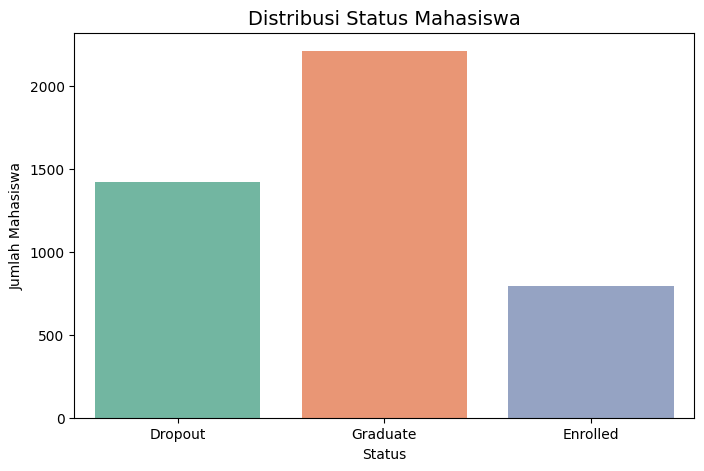

In [20]:
# Ukuran figure
plt.figure(figsize=(8, 5))

# Bar chart kolom 'Status'
sns.countplot(data=df, x='Status', palette='Set2')

# Tambahkan label dan judul
plt.title('Distribusi Status Mahasiswa', fontsize=14)
plt.xlabel('Status')
plt.ylabel('Jumlah Mahasiswa')

# Tampilkan chart
plt.show()

### Penjelasan Visualisasi
Mahasiswa dengan status Graduate memiliki nilai tertinggi, disusul oleh Dropout, sementara Enrolled menunjukkan nilai terendah.

In [21]:
# Melihat distribusi status
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [22]:
# Misah data berdasarkan status
df_train = df[df['Status'].isin(['Dropout', 'Graduate'])] # Digunakan untuk membangun model prediksi mahasiswa do atau tidak
df_predict = df[df['Status'] == 'Enrolled']

In [23]:
# Encode label
df_train['Status'] = df_train['Status'].map({'Dropout': 0, 'Graduate': 1})

/tmp/ipython-input-23-3428261027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Status'] = df_train['Status'].map({'Dropout': 0, 'Graduate': 1})


In [24]:
# Membagi data menjadi data training dan testing
train_df, test_df = train_test_split(df_train, test_size=0.2, random_state=42, stratify=df_train['Status'])

In [25]:
print(train_df.shape)
print(test_df.shape)

(2904, 37)
(726, 37)


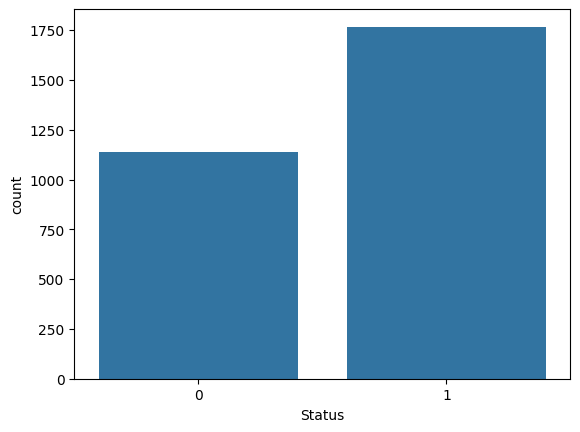

In [26]:
# Memvisualisasikan perbandingan data graduate dan dropout
sns.countplot(data=train_df, x="Status")
plt.show()

### Penjelasan Visualisasi
Data mahasiswa graduate lebih banyak dibanding data mahasiswa dropout

In [27]:
train_df.Status.value_counts()

,count
Status,
1,1767
0,1137


In [28]:
df_majority = train_df[(train_df.Status == 1)]
df_minority = train_df[(train_df.Status == 0)]

In [29]:
# Menerapkan teknik undersampling
df_majority_undersampled = resample(df_majority, n_samples=1137, random_state=42)
print(df_majority_undersampled.shape)

(1137, 37)


In [30]:
undersampled_train_df = pd.concat([df_minority, df_majority_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
248,1,1,3,9773,1,1,146.0,1,38,38,9,7,134.1,1,0,0,1,1,1,18,0,0,6,6,6,12.500000,0,0,6,7,6,12.666667,0,10.8,1.4,1.74,0
142,1,17,1,9853,1,1,127.0,1,1,1,5,7,121.4,1,0,0,1,0,0,18,0,0,7,8,7,11.571429,0,0,7,9,6,13.166667,0,11.1,0.6,2.02,0
315,1,7,1,9773,1,43,140.0,1,19,1,4,8,140.0,0,0,0,1,1,0,25,0,0,6,6,6,14.666667,0,0,6,6,6,13.500000,0,11.1,0.6,2.02,1
1249,1,1,1,9853,1,1,132.0,1,1,19,3,3,122.9,1,0,0,1,0,0,20,0,0,7,7,7,13.857143,0,0,7,7,7,13.285714,0,11.1,0.6,2.02,1
1372,1,1,1,171,1,1,188.0,1,3,3,2,2,178.3,1,0,0,1,0,0,18,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06,0


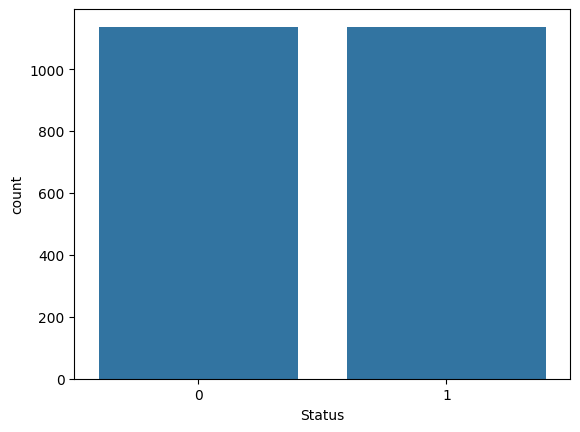

In [31]:
# Memvisualisasikan jumlah data setelah undersampling
sns.countplot(data=undersampled_train_df, x="Status")
plt.show()

### Penjelasan Visualisasi
Setelah melakukan teknik undersampling data mahasiswa graduate dan dropout memiliki jumlah yang sama

In [32]:
# Menampilkan jumlah data setelah menerapkan undersampling
undersampled_train_df.Status.value_counts()

,count
Status,
1,1137
0,1137


In [33]:
X_train = undersampled_train_df.drop(columns="Status", axis=1)
y_train = undersampled_train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

## Modeling

## Decision Tree

In [34]:
tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2']})

In [35]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}


In [36]:
os.makedirs("model", exist_ok=True)

In [37]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='entropy',
    max_depth=8,
    max_features='sqrt'
)

tree_model.fit(X_train, y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

## Random Forest

In [38]:
rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [39]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


In [40]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=500,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1
)
rdf_model.fit(X_train, y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

## Gradient Boosting

In [41]:
gboost_model = GradientBoostingClassifier(random_state=123)

param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': [None, 'sqrt', 'log2']
}

CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [42]:
print("best parameters: ", CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}


In [43]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.1,
    max_depth=5,
    max_features='sqrt',
    n_estimators=200
)
gboost_model.fit(X_train, y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

## Evaluation

In [44]:
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Dropout', 'Graduate']

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

## Decision Tree

In [45]:
y_pred_test = tree_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       284
           1       0.89      0.88      0.89       442

    accuracy                           0.86       726
   macro avg       0.85      0.86      0.85       726
weighted avg       0.86      0.86      0.86       726



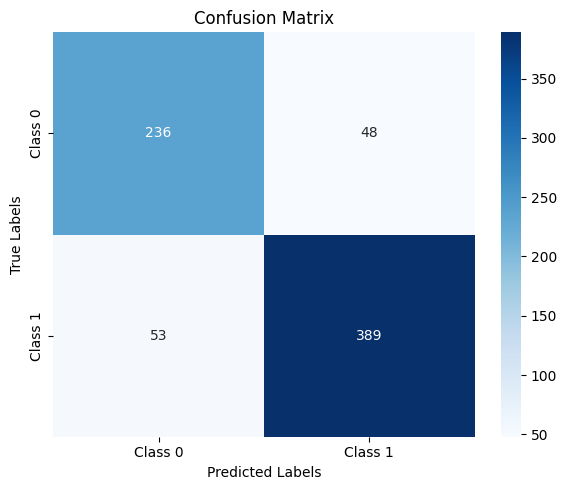

In [46]:
# Tampilkan classification report
print(classification_report(y_test, y_pred_test))

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

## Random Forest

In [47]:
y_pred_test = rdf_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       284
           1       0.89      0.94      0.92       442

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.89       726



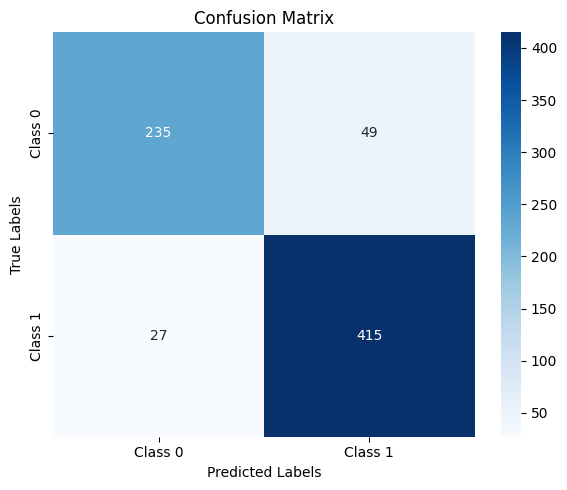

In [48]:
# Tampilkan classification report
print(classification_report(y_test, y_pred_test))

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

## Gradient Boosting

In [49]:
y_pred_test = gboost_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       284
           1       0.91      0.93      0.92       442

    accuracy                           0.90       726
   macro avg       0.89      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



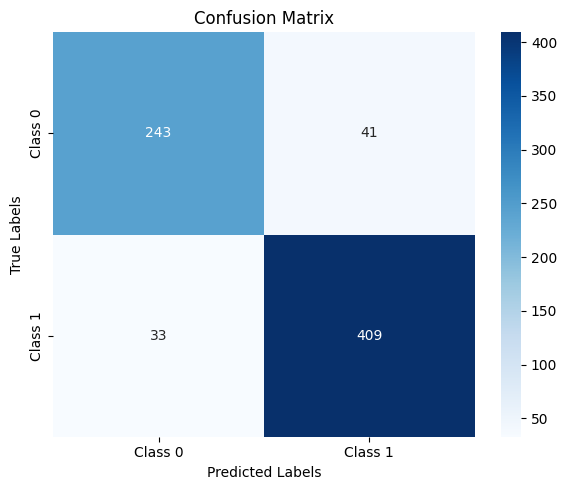

In [50]:
# Tampilkan classification report
print(classification_report(y_test, y_pred_test))

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

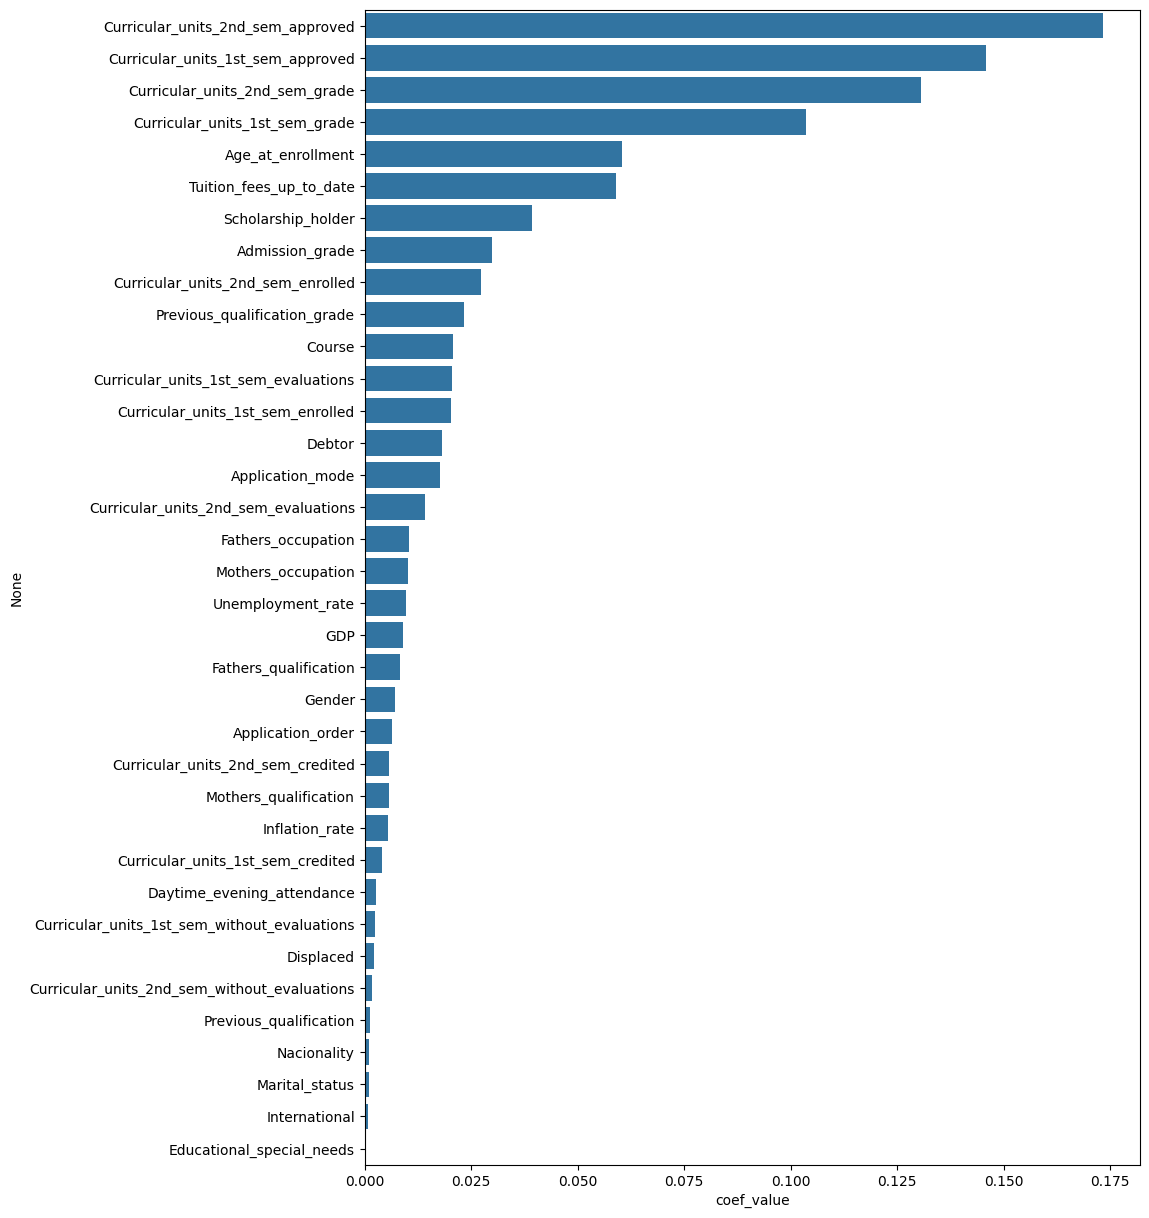

,coef_value
Curricular_units_2nd_sem_approved,0.173292
Curricular_units_1st_sem_approved,0.145991
Curricular_units_2nd_sem_grade,0.130545
Curricular_units_1st_sem_grade,0.103665
Age_at_enrollment,0.060387
Tuition_fees_up_to_date,0.058989
Scholarship_holder,0.039266
Admission_grade,0.029909
Curricular_units_2nd_sem_enrolled,0.027214
Previous_qualification_grade,0.023429


In [62]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 15))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(gboost_model.feature_importances_, X_train.columns)

### Penjelasan Visualisasi
Grafik di atas menampilkan fitur-fitur yang memiliki pengaruh terbesar terhadap tingkat dropout mahasiswa. Berdasarkan analisis model, berikut adalah 5 fitur utama yang paling berpengaruh:

1. Curricular_units_2nd_sem_approved (0.173291)
- Menunjukkan jumlah mata kuliah yang disetujui (lulus) di semester kedua. Mahasiswa yang menyelesaikan lebih banyak mata kuliah cenderung memiliki risiko dropout yang lebih rendah.

2. Curricular_units_1st_sem_approved (0.145991)
- Sama seperti semester kedua, jumlah mata kuliah yang disetujui di semester pertama juga merupakan indikator penting. Kinerja awal yang baik biasanya menandakan keberlangsungan studi.

3. Curricular_units_2nd_sem_grade (0.130545)
- Merupakan nilai rata-rata mata kuliah pada semester kedua. Nilai yang lebih tinggi menunjukkan performa akademik yang baik, yang berkorelasi negatif dengan dropout.

4. Curricular_units_1st_sem_grade (0.103665)
Nilai rata-rata di semester pertama. Seperti poin sebelumnya, nilai yang baik di awal perkuliahan menjadi faktor protektif terhadap dropout.

5. Age_at_enrollment (0.060387)
Usia saat pertama kali mendaftar. Mahasiswa yang mendaftar di usia yang lebih tua bisa jadi memiliki tantangan tambahan (misalnya pekerjaan atau tanggung jawab keluarga) yang bisa meningkatkan risiko dropout.

# Load Model

In [51]:
import joblib

# Simpan model ke file .pkl
joblib.dump(gboost_model, 'model.pkl')

['model.pkl']

In [52]:
model = joblib.load('model.pkl')

In [53]:
# Prediksi label dan probabilitas
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

In [54]:
# Gabungkan hasil prediksi dengan data asli
df_inference = X_test.copy()
df_inference['Predicted_Status'] = y_test_pred
df_inference['Dropout_Probability'] = y_test_prob
df_inference['True_Status'] = y_test.values  # Label asli dari dataset

# Tampilkan 5 baris pertama hasil prediksi
print(df_inference.head())

# Simpan hasil inference ke file CSV
df_inference.to_csv("hasil_inference_dropouts.csv", index=False)

     Marital_status Application_mode  Application_order Course  \
3734              1               43                  1   9147   
13                1               53                  1   9254   
2182              1               43                  1   9500   
3939              1                1                  5   9500   
2054              1                1                  2   9556   

     Daytime_evening_attendance Previous_qualification  \
3734                          1                      1   
13                            1                     42   
2182                          1                      1   
3939                          1                      1   
2054                          1                      1   

      Previous_qualification_grade Nacionality Mothers_qualification  \
3734                         129.0           1                    19   
13                           110.0           1                     1   
2182                         140.0    

In [55]:
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

# Mengupload Dataset ke PostgreSQL

In [61]:
URL = "postgresql://postgres.gfmoxnknvhmrguafimuc:<MY PASSWORD>@aws-0-ap-southeast-1.pooler.supabase.com:6543/postgres"
engine = create_engine(URL)
undersampled_train_df.to_sql('student_dropout_db', engine)

OperationalError: (psycopg2.OperationalError) could not translate host name "madewqe3213@aws-0-ap-southeast-1.pooler.supabase.com" to address: Name or service not known

(Background on this error at: https://sqlalche.me/e/20/e3q8)